**Table of contents**<a id='toc0_'></a>    
- [Importing Libraries](#toc1_)    
- [Configuring Visualization Parameters](#toc2_)    
- [Configuring Other Notebook Parameters](#toc3_)    
- [Pre-installing Custom Functions](#toc4_)    
- [Practicing in Stages](#toc5_)    
  - [ANN with MNIST - Part One - Data](#toc5_1_)    
    - [Loading the MNIST dataset](#toc5_1_1_)    
- [Notebook Compression](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Importing Libraries](#toc0_)


In [1]:
import torch
import torch.nn as nn
# Use an abbreviation to improve programming efficiency
import torch.nn.functional as F

In [2]:
# Batch load data through `DataLoader`
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
# Use `confusion_matrix` to evaluate the result
from sklearn.metrics import confusion_matrix  

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
from ipynbcompress import compress
import os
import reprlib
import sys

# <a id='toc2_'></a>[Configuring Visualization Parameters](#toc0_)


In [6]:
%matplotlib inline

In [7]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [8]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": 0.8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# <a id='toc3_'></a>[Configuring Other Notebook Parameters](#toc0_)


In [9]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# <a id='toc4_'></a>[Pre-installing Custom Functions](#toc0_)


In [10]:
sys.path.append("../")

In [11]:
from Modules import *

# <a id='toc5_'></a>[Practicing in Stages](#toc0_)

## <a id='toc5_1_'></a>[ANN with MNIST - Part One - Data](#toc0_)

### <a id='toc5_1_1_'></a>[Loading the MNIST dataset](#toc0_)


In [12]:
# Convert MNIST images to tensors
transform = transforms.ToTensor()

train_data = datasets.MNIST(
    root="../Datasets", train=True, download=True, transform=transform
)
test_data = datasets.MNIST(
    root="../Datasets", train=False, download=True, transform=transform
)

tabulation = Form_Generator()
tabulation.heading_printer("Loading the MNIST training and testing datasets")

statements = [
    """
transform = transforms.ToTensor()

train_data = datasets.MNIST(
    root="../Datasets", train=True, download=True, transform=transform
)
test_data = datasets.MNIST(
    root="../Datasets", train=False, download=True, transform=transform
)
"""
]
tabulation.long_statement_generator(statements)

variables = ["transform", "train_data", "test_data"]
values = [
    str(transform),
    str(reprlib_rules.repr(train_data)),
    str(reprlib_rules.repr(test_data)),
]
tabulation.variable_generator(variables, values)

expressions = [
    "len(train_data)",
    "train_data[0]",
    "type(train_data[0])",
    "len(train_data[0])",
    "len(test_data)",
    "test_data[0]",
    "type(test_data[0])",
    "len(test_data[0])",
]
results = [
    str(len(train_data)),
    str(reprlib_rules.repr(train_data[0])),
    str(type(train_data[0])),
    str(len(train_data[0])),
    str(len(test_data)),
    str(reprlib_rules.repr(test_data[0])),
    str(type(test_data[0])),
    str(len(test_data[0])),
]
tabulation.expression_generator(expressions, results)

Loading the MNIST training and testing datasets

    +-----------------------------------------------------+
    | Statement                                           |
    +-----------------------------------------------------+
    | transform = transforms.ToTensor()                   |
    |                                                     |
    | train_data = datasets.MNIST(                        |
    |     root="../Datasets", train=True, download=True,  |
    |     transform=transform                             |
    | )                                                   |
    | test_data = datasets.MNIST(                         |
    |     root="../Datasets", train=False, download=True, |
    |     transform=transform                             |
    | )                                                   |
    +-----------------------------------------------------+
    +------------+---------------------------------+
    | Variable   | Value                           |
    +

In [13]:
# Each element in the training data or test data is a 2-element tuple
image, label = train_data[0]

tabulation = Form_Generator()
tabulation.heading_printer("Examining a training record")

statements = ["image, label = train_data[0]"]
tabulation.long_statement_generator(statements)

variables = ["image", "label"]
values = [str(reprlib_rules.repr(image)), str(label)]
tabulation.variable_generator(variables, values)

expressions = ["image.shape"]
results = [str(image.shape)]
tabulation.expression_generator(expressions, results)

Examining a training record

    +------------------------------+
    | Statement                    |
    +------------------------------+
    | image, label = train_data[0] |
    +------------------------------+
    +----------+----------------------------------------------+
    | Variable | Value                                        |
    +----------+----------------------------------------------+
    | image    | tensor([[[0.0000, 0.0000, 0.0000, 0.0000,    |
    |          |         0.0000, 0.0000, 0.0000, 0.0000,      |
    |          |           0.0000, 0.0000, 0.0000, 0.0000,    |
    |          |         0.0000,...0000,                      |
    |          |           0.0000, 0.0000, 0.0000, 0.0000,    |
    |          |         0.0000, 0.0000, 0.0000, 0.0000,      |
    |          |           0.0000, 0.0000, 0.0000, 0.0000]]]) |
    | label    | 5                                            |
    +----------+----------------------------------------------+
    +-------------

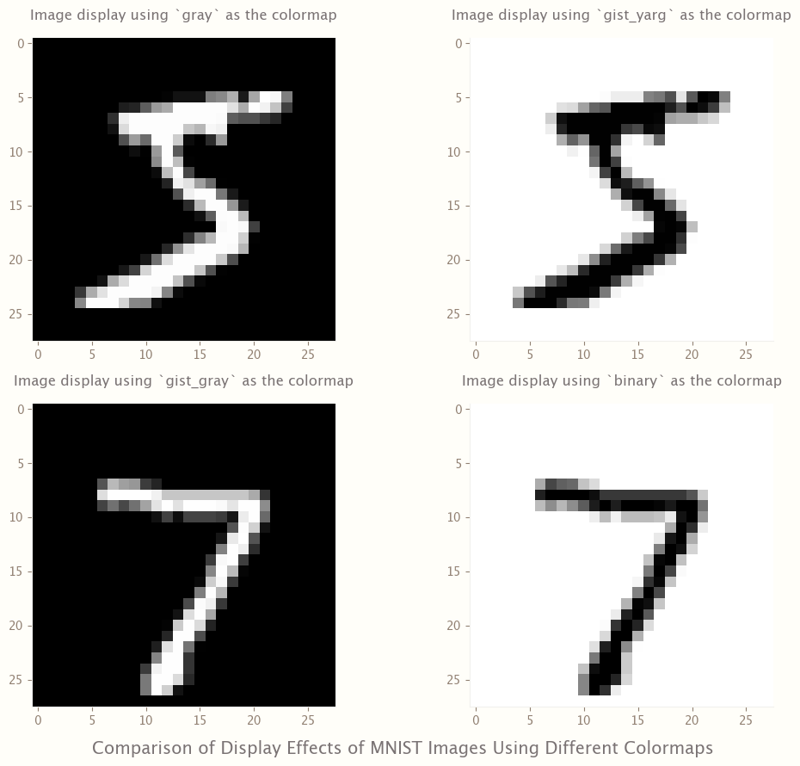

In [20]:
plt.rcParams["figure.figsize"] = (figure_size[0] / 3 * 2, figure_size[1])

fig, axs = plt.subplots(nrows=2, ncols=2)

# Data can be displayed as an image using `imshow`, but only on a 2D regular raster

# Dates need to be reshaped into 2D arrays when displaying data using `imshow`
axs[0, 0].imshow(train_data[0][0].reshape((28, 28)), cmap="gray")
axs[0, 0].grid(False)
axs[0, 0].set_title("Image display using `gray` as the colormap", loc="center", pad=15)

axs[0, 1].imshow(train_data[0][0].reshape((28, 28)), cmap="binary")
axs[0, 1].grid(False)
axs[0, 1].set_title(
    "Image display using `gist_yarg` as the colormap", loc="center", pad=15
)

# `gist_gray` and `gray` belong to the Sequential2 class of colormap, and they are almost 
# identical to the naked eye, showing a monotonous gradient from black to white
axs[1, 0].imshow(test_data[0][0].reshape((28, 28)), cmap="gist_gray")
axs[1, 0].grid(False)
axs[1, 0].set_title(
    "Image display using `gist_gray` as the colormap", loc="center", pad=15
)

# `gist_yarg` and `binary` belong to the Sequential2 class of colormap, and they are almost 
# identical to the naked eye, showing a monotonous gradient from white to black
axs[1, 1].imshow(test_data[0][0].reshape((28, 28)), cmap="gist_yarg")
axs[1, 1].grid(False)
axs[1, 1].set_title(
    "Image display using `binary` as the colormap", loc="center", pad=15
)

fig.suptitle(
    "Comparison of Display Effects of MNIST Images Using Different Colormaps",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

# <a id='toc6_'></a>[Notebook Compression](#toc0_)


In [15]:
input_filename = "2 - CNN - Convolutional Neural Networks.ipynb"

output_filename = " (Compressed).".join(input_filename.split("."))

print(os.stat(input_filename).st_size)

# Keep the original file and create another compressed file to upload to GitHub by
# specifying the width of the output image
compress(
    input_filename, output_filename=output_filename, img_width=800, img_format="png"
)

print(os.stat(output_filename).st_size)

85620
2 - CNN - Convolutional Neural Networks.ipynb: warning: no compression - 44516 bytes gained
130136
